<a href="https://colab.research.google.com/github/sushantkumar-estech/Traffic-signal-classification-using-LeNet-CNN/blob/master/Traffic_SIgnal_Classification_using_LENET_Network_Architecture_(tensorflow_2_0_%2B_google_colab)_for_43_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP #0: Importing Libraries

In [16]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [17]:
#!pip uninstall -y tensorflow
#!pip install tensorflow

In [3]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=af27866114a1d8a9c9b0cdd50281cda609adae7ad04e1fc1c31bb154fbb47940
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [7]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
from tensorflow.keras import layers

In [8]:
tf.__version__

'1.15.2'

##STEP #1: Importing the dataset & Normaliszing it

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# opening the the .p files in read binary mode and then loading them

with open('/content/drive/My Drive/ML_Dataset/traffic-signs-data/train.p', mode='rb') as training_data :
  train = pickle.load(training_data)
with open('/content/drive/My Drive/ML_Dataset/traffic-signs-data/test.p', mode='rb') as testing_data :
  test = pickle.load(testing_data)
with open('/content/drive/My Drive/ML_Dataset/traffic-signs-data/valid.p', mode='rb') as validation_data :
  valid = pickle.load(validation_data)

In [11]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

In [14]:
X_valid.shape

(4410, 32, 32, 3)

In [15]:
y_valid.shape

(4410,)

In [16]:
X_test.shape

(12630, 32, 32, 3)

In [17]:
y_test.shape

(12630,)

## STEP #2: VIsualizing the Dataset

25

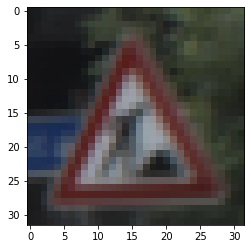

In [18]:
i = random.randint(1, 34799)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

38

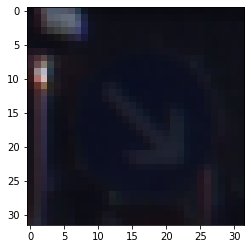

In [19]:
i = random.randint(1, 4410)
plt.imshow(X_valid[i]) # showing the image
y_valid[i] # showing the label of that images

36

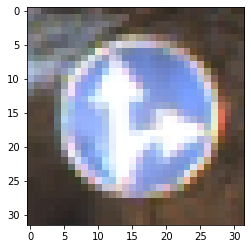

In [20]:
i = random.randint(1, 12630)
plt.imshow(X_test[i]) # showing the image
y_test[i] # showing the label of that images

## STPE #3: Data Preparation

Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.

The obvious case where you'd shuffle your data is if your data is sorted by their class/target. Here, you will want to shuffle to make sure that your training/test/validation sets are representative of the overall distribution of the data.

For batch gradient descent, the same logic applies. The idea behind batch gradient descent is that by calculating the gradient on a single batch, you will usually get a fairly good estimate of the "true" gradient. That way, you save computation time by not having to calculate the "true" gradient over the entire dataset every time.

You want to shuffle your data after each epoch because you will always have the risk to create batches that are not representative of the overall dataset, and therefore, your estimate of the gradient will be off. Shuffling your data after each epoch ensures that you will not be "stuck" with too many bad batches.

In regular stochastic gradient descent, when each batch has size 1, you still want to shuffle your data after each epoch to keep your learning general. Indeed, if data point 17 is always used after data point 16, its own gradient will be biased with whatever updates data point 16 is making on the model. By shuffling your data, you ensure that each data point creates an "independent" change on the model, without being biased by the same points before them.

The generator uses tf.keras.layers.Conv2DTranspose (upsampling) layers to produce an image from a seed (random noise). Start with a Dense layer that takes this seed as input, then upsample several times untill you reach the desired image size of 28X28X1. Notice that tf.keras.layers.LeakyReLU activation for each layer, except the output layer which uses tanh

In [21]:
# Shuffling the Dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [22]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [23]:
X_train_gray.shape

(34799, 32, 32, 1)

In [24]:
X_valid_gray.shape

(4410, 32, 32, 1)

In [25]:
X_test_gray.shape

(12630, 32, 32, 1)

In [26]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [27]:
X_train_gray_norm

array([[[[-0.890625  ],
         [-0.875     ],
         [-0.88020833],
         ...,
         [-0.8984375 ],
         [-0.90364583],
         [-0.90104167]],

        [[-0.8828125 ],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.8984375 ],
         [-0.8984375 ],
         [-0.8984375 ]],

        [[-0.890625  ],
         [-0.8984375 ],
         [-0.890625  ],
         ...,
         [-0.8984375 ],
         [-0.890625  ],
         [-0.8984375 ]],

        ...,

        [[-0.81510417],
         [-0.87239583],
         [-0.8984375 ],
         ...,
         [-0.89583333],
         [-0.90625   ],
         [-0.90104167]],

        [[-0.8203125 ],
         [-0.875     ],
         [-0.8984375 ],
         ...,
         [-0.90104167],
         [-0.90364583],
         [-0.90364583]],

        [[-0.82552083],
         [-0.87239583],
         [-0.89583333],
         ...,
         [-0.8984375 ],
         [-0.90885417],
         [-0.90364583]]],


       [[[-0.3359375 ],


In [28]:
X_valid_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


In [29]:
X_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


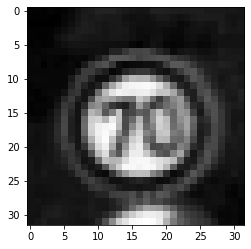

In [30]:
i = random.randint(1, 34799)
plt.imshow(X_train_gray_norm[i].reshape((32,32)), cmap = 'gray')

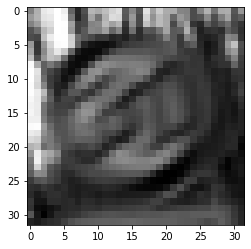

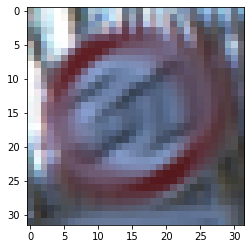

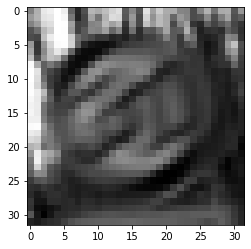

In [31]:
# same thing can be achieved witht the following code as well
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

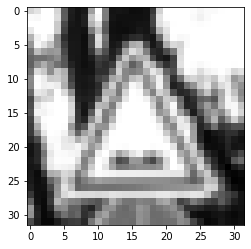

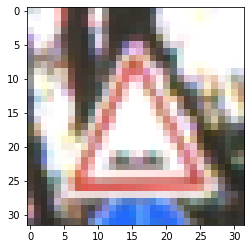

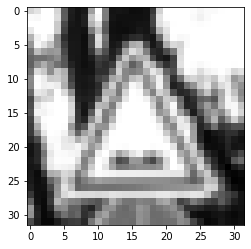

In [32]:
i = 610
plt.imshow(X_valid_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_valid[i])
plt.figure()
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap='gray')

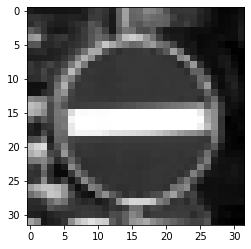

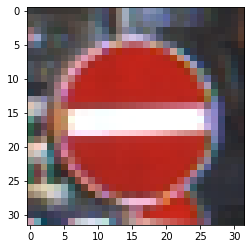

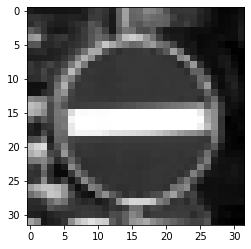

In [33]:
i = 1000
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

## STEP #4: Model Training

In [34]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________

In [35]:
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=50, batch_size=500, verbose=1,
                        validation_data = (X_valid_gray_norm, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 16s 453us/sample - loss: 3.2320 - acc: 0.1556 - val_loss: 2.7322 - val_acc: 0.3134
Epoch 2/50
34799/34799 [==============================] - 15s 445us/sample - loss: 1.6525 - acc: 0.5445 - val_loss: 1.3244 - val_acc: 0.6129
Epoch 3/50
34799/34799 [==============================] - 15s 445us/sample - loss: 0.9019 - acc: 0.7439 - val_loss: 0.9472 - val_acc: 0.7061
Epoch 4/50
34799/34799 [==============================] - 16s 448us/sample - loss: 0.6525 - acc: 0.8190 - val_loss: 0.7707 - val_acc: 0.7578
Epoch 5/50
34799/34799 [==============================] - 16s 448us/sample - loss: 0.5210 - acc: 0.8574 - val_loss: 0.7216 - val_acc: 0.7760
Epoch 6/50
34799/34799 [==============================] - 16s 447us/sample - loss: 0.4314 - acc: 0.8826 - val_loss: 0.6655 - val_acc: 0.7957
Epoch 7/50
34799/34799 [==============================] - 16s 446us/sample - loss: 0.3700 - acc: 0.9006 -

##STEP #5: Model Evaluation

In [37]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

12630/12630 [==============================] - 4s 328us/sample - loss: 1.1710 - acc: 0.8842


In [38]:
print('LeNEt Model accuracy on Test Dataset: {}'.format(score[1]))

LeNEt Model accuracy on Test Dataset: 0.8842438459396362


In [39]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [42]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [43]:
epochs = range(len(accuracy)) # we coudl have given the values directly as we alread know the the number of epochs while training the model
epochs

range(0, 50)

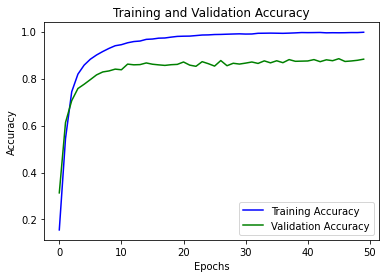

In [44]:
plt.plot(epochs, accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

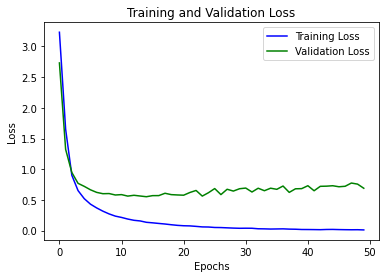

In [45]:
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [46]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

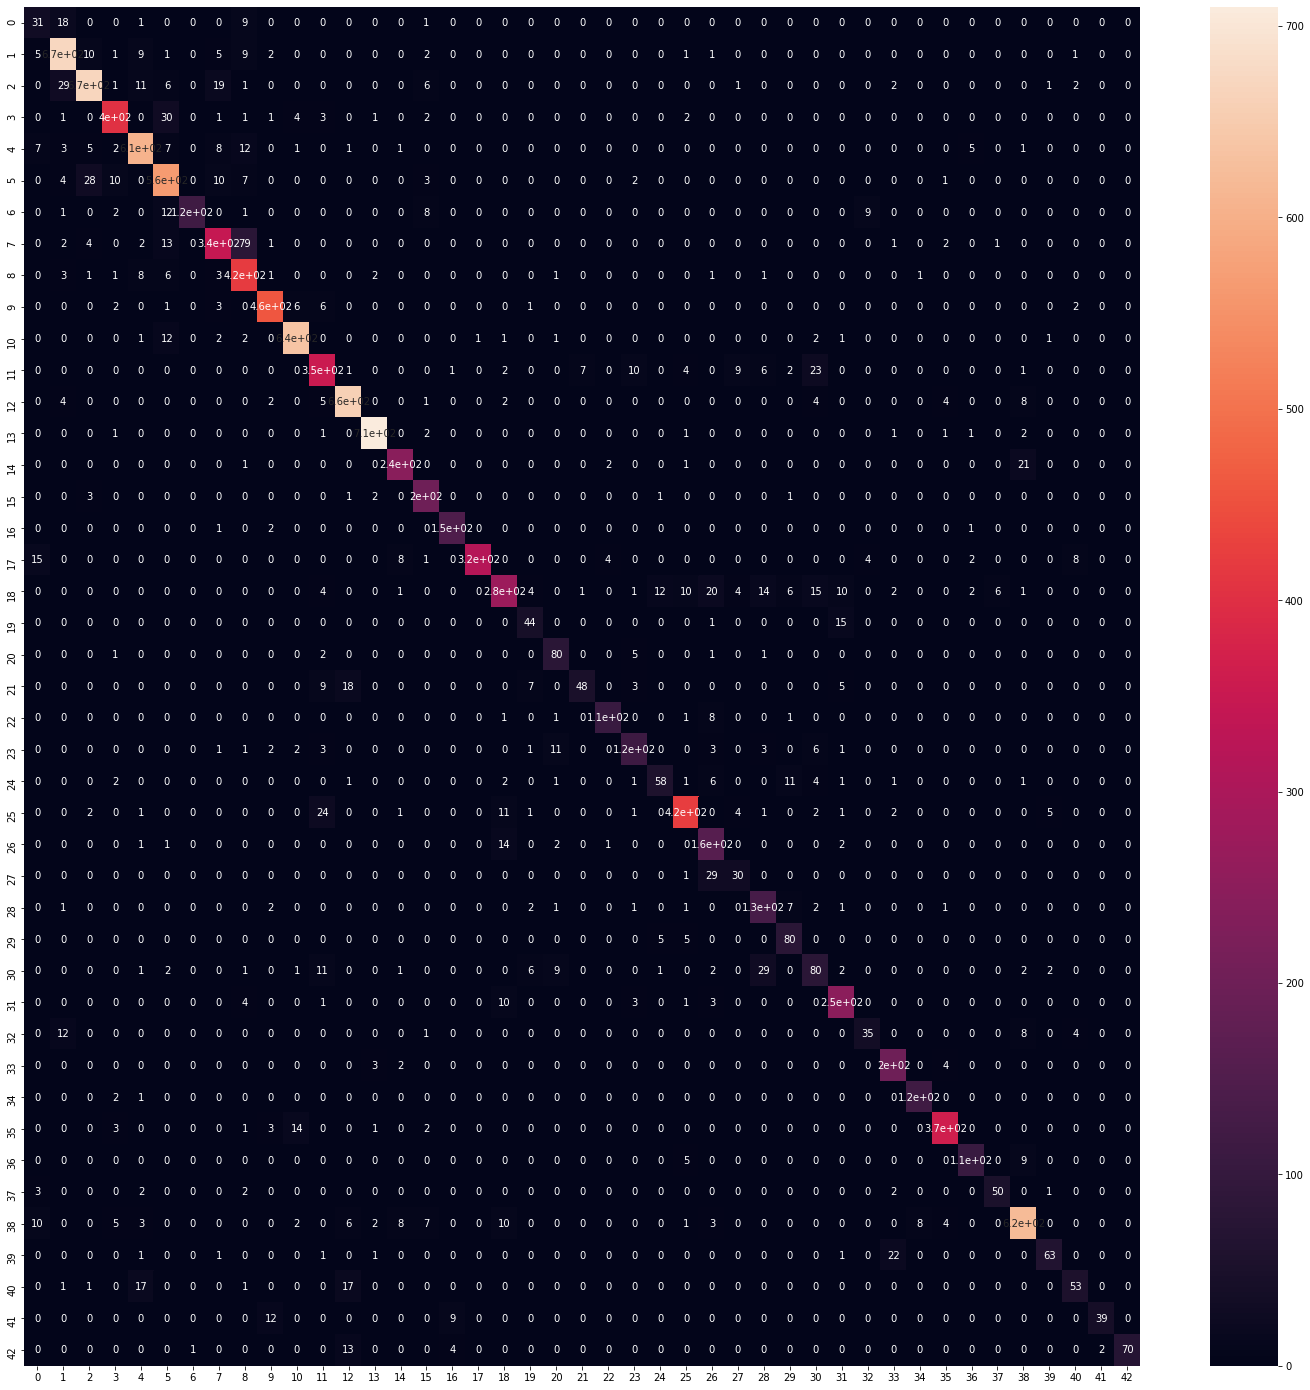

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot = True)

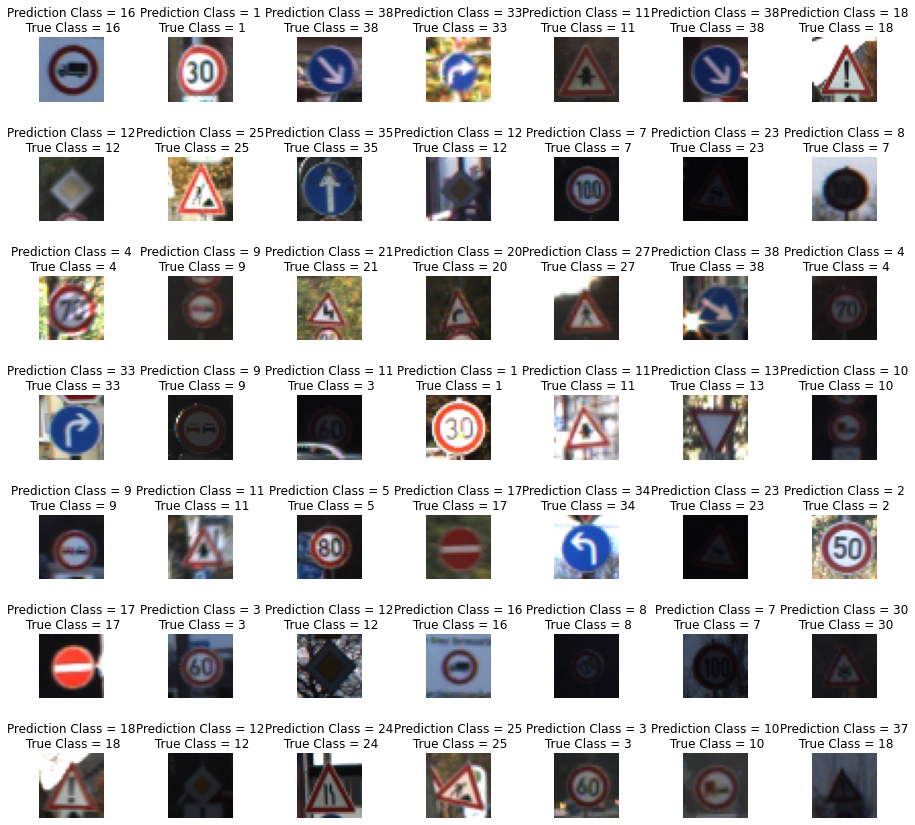

In [48]:
# Image Augementation to generate the new dataset by rotating 90, left, counterclockwise, blurr, shorten, sharpen
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [49]:
# classification report of Model Performance on Testing Data
from sklearn.metrics import classification_report

num_classes = 43
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.44      0.52      0.47        60
     Class 1       0.89      0.93      0.91       720
     Class 2       0.93      0.89      0.91       750
     Class 3       0.92      0.90      0.91       450
     Class 4       0.91      0.92      0.92       660
     Class 5       0.86      0.90      0.88       630
     Class 6       0.99      0.78      0.87       150
     Class 7       0.86      0.77      0.81       450
     Class 8       0.76      0.94      0.84       450
     Class 9       0.94      0.96      0.95       480
    Class 10       0.95      0.96      0.96       660
    Class 11       0.83      0.84      0.84       420
    Class 12       0.92      0.96      0.94       690
    Class 13       0.98      0.99      0.98       720
    Class 14       0.92      0.91      0.91       270
    Class 15       0.85      0.96      0.90       210
    Class 16       0.91      0.97      0.94       150
    Class 17       1.00    